In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Aegean/Aegean(SKG_VIE).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,17:00:00,17:35:00,0,6,0,1,1,220,173.28
1,18:30:00,17:35:00,0,6,0,1,1,220,173.28
2,20:50:00,17:35:00,0,6,0,1,1,220,173.28
3,14:00:00,17:35:00,0,6,0,2,1,111,190.71
4,12:40:00,16:25:00,0,6,1,1,0,220,336.28


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9726 entries, 0 to 9725
Data columns (total 9 columns):
departure_time      9726 non-null object
arrival_time        9726 non-null object
days_before         9726 non-null int64
day_of_week         9726 non-null int64
num_of_luggage      9726 non-null int64
num_of_stops        9726 non-null int64
overnight_flight    9726 non-null int64
Class               9726 non-null int64
price               9726 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 684.0+ KB


In [7]:
df.shape

(9726, 9)

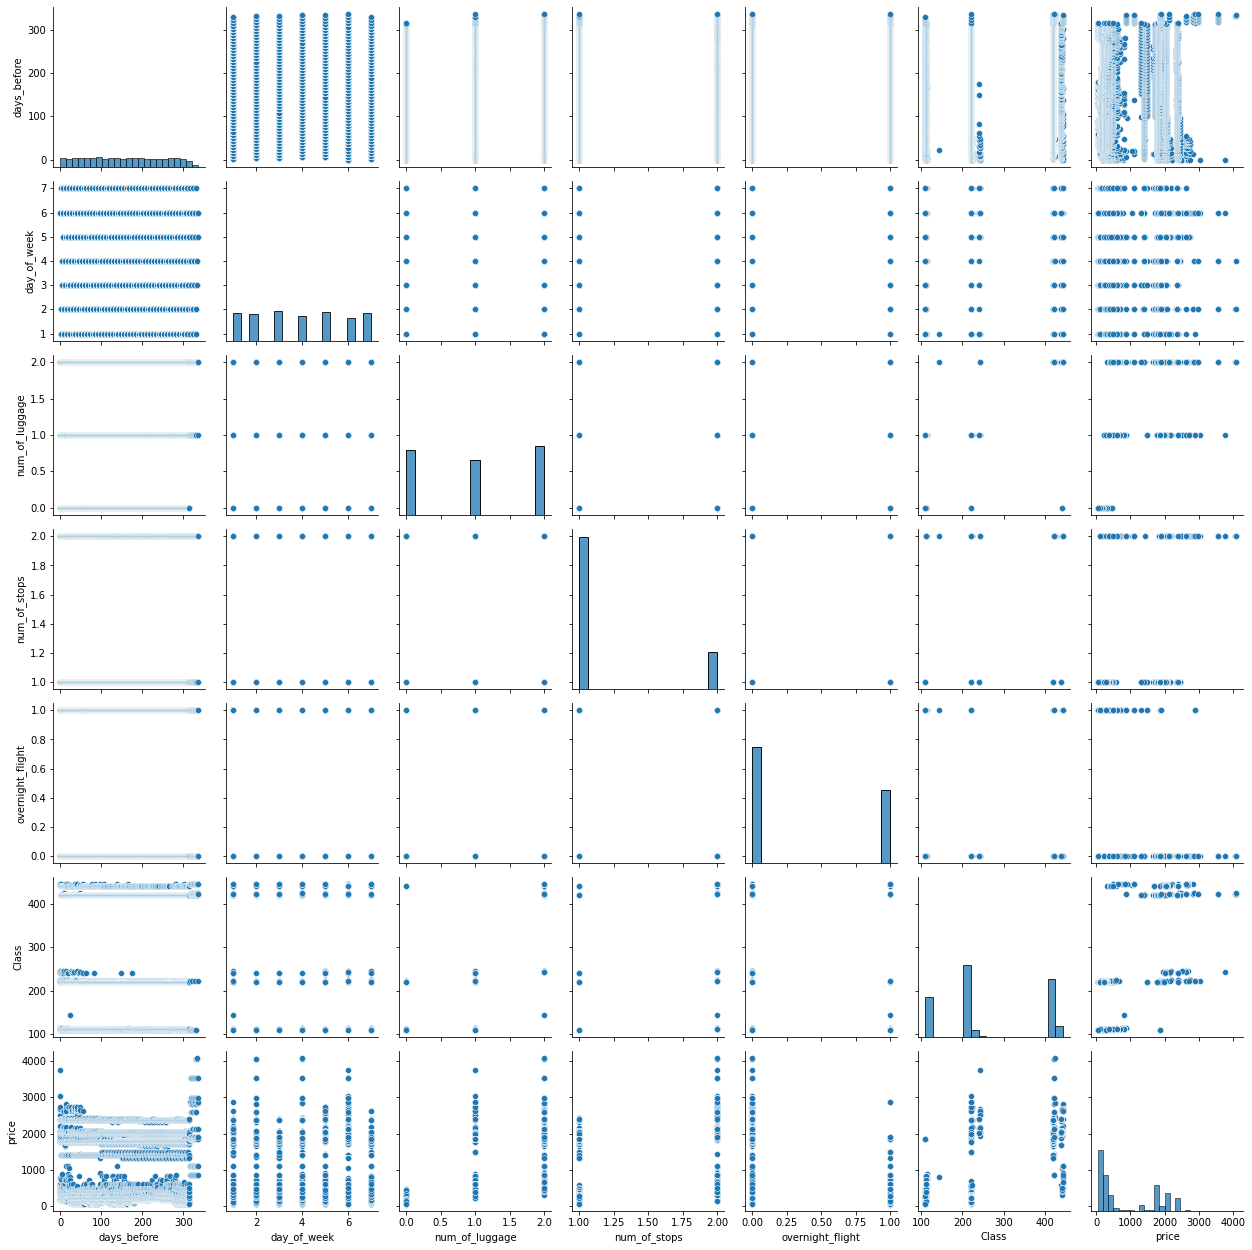

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 17:00:00,1900-01-01 17:35:00,0,6,0,1,1,220,173.28
1,1900-01-01 18:30:00,1900-01-01 17:35:00,0,6,0,1,1,220,173.28
2,1900-01-01 20:50:00,1900-01-01 17:35:00,0,6,0,1,1,220,173.28
3,1900-01-01 14:00:00,1900-01-01 17:35:00,0,6,0,2,1,111,190.71
4,1900-01-01 12:40:00,1900-01-01 16:25:00,0,6,1,1,0,220,336.28


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 17:00:00,1900-01-01 17:35:00,0,6,0,1,1,220,173.28,-2208927600000000000,-2208925500000000000
1,1900-01-01 18:30:00,1900-01-01 17:35:00,0,6,0,1,1,220,173.28,-2208922200000000000,-2208925500000000000
2,1900-01-01 20:50:00,1900-01-01 17:35:00,0,6,0,1,1,220,173.28,-2208913800000000000,-2208925500000000000
3,1900-01-01 14:00:00,1900-01-01 17:35:00,0,6,0,2,1,111,190.71,-2208938400000000000,-2208925500000000000
4,1900-01-01 12:40:00,1900-01-01 16:25:00,0,6,1,1,0,220,336.28,-2208943200000000000,-2208929700000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,6,0,0,1,1,220,173.28
1,6,0,0,1,1,220,173.28
2,6,0,0,1,1,220,173.28
3,6,0,0,2,1,111,190.71
4,6,0,1,1,0,220,336.28


In [21]:
df.to_csv('skg_vie_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [1]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8800251144390325


In [2]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9476987390195989


In [3]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9451852406842695


In [4]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9484053335753472


In [5]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9047110408587277


In [6]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9484046848902681


In [7]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.815324984416857


In [8]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.873111678790353


In [9]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
244/244 [==============================] - 5s 5ms/step - loss: 318335.1875 - val_loss: 509208.6250
Epoch 2/200
244/244 [==============================] - 1s 4ms/step - loss: 219992.0938 - val_loss: 480567.4375
Epoch 3/200
244/244 [==============================] - 1s 4ms/step - loss: 174380.6250 - val_loss: 372848.2188
Epoch 4/200
244/244 [==============================] - 1s 4ms/step - loss: 115709.1797 - val_loss: 261959.8594
Epoch 5/200
244/244 [==============================] - 1s 4ms/step - loss: 107810.3594 - val_loss: 199531.8750
Epoch 6/200
244/244 [==============================] - 1s 4ms/step - loss: 104590.7656 - val_loss: 341440.6875
Epoch 7/200
244/244 [==============================] - 1s 4ms/step - loss: 97827.8359 - val_loss: 172794.0156
Epoch 8/200
244/244 [==============================] - 1s 4ms/step - loss: 94045.7578 - val_loss: 174048.2812
Epoch 9/200
244/244 [==============================] - 1s 4ms/step - loss: 93141.1719 - val_loss: 244032.3906
Epoc

Epoch 75/200
244/244 [==============================] - 1s 4ms/step - loss: 65184.2266 - val_loss: 237967.9844
Epoch 76/200
244/244 [==============================] - 1s 4ms/step - loss: 65841.0859 - val_loss: 186145.5469
Epoch 77/200
244/244 [==============================] - 1s 4ms/step - loss: 65172.8906 - val_loss: 164716.2031
Epoch 78/200
244/244 [==============================] - 1s 4ms/step - loss: 64436.7461 - val_loss: 207854.7031
Epoch 79/200
244/244 [==============================] - 1s 4ms/step - loss: 65467.2305 - val_loss: 172588.4219
Epoch 80/200
244/244 [==============================] - 1s 4ms/step - loss: 65476.6250 - val_loss: 232913.3281
Epoch 81/200
244/244 [==============================] - 1s 4ms/step - loss: 64273.3906 - val_loss: 208407.7188
Epoch 82/200
244/244 [==============================] - 1s 4ms/step - loss: 64003.8555 - val_loss: 175355.0625
Epoch 83/200
244/244 [==============================] - 1s 4ms/step - loss: 66567.4375 - val_loss: 253551.0625
E

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.870975052602093


In [10]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
244/244 [==============================] - 1s 5ms/step - loss: 360808.1875 - val_loss: 472141.3125
Epoch 2/200
244/244 [==============================] - 1s 4ms/step - loss: 229297.5781 - val_loss: 647042.5625
Epoch 3/200
244/244 [==============================] - 1s 4ms/step - loss: 218033.9062 - val_loss: 447097.2500
Epoch 4/200
244/244 [==============================] - 1s 4ms/step - loss: 190971.3750 - val_loss: 744342.2500
Epoch 5/200
244/244 [==============================] - 1s 4ms/step - loss: 126011.0469 - val_loss: 212256.1094
Epoch 6/200
244/244 [==============================] - 1s 4ms/step - loss: 105214.8984 - val_loss: 189013.3594
Epoch 7/200
244/244 [==============================] - 1s 4ms/step - loss: 101051.5469 - val_loss: 185467.9531
Epoch 8/200
244/244 [==============================] - 1s 4ms/step - loss: 98785.7031 - val_loss: 152479.6875
Epoch 9/200
244/244 [==============================] - 1s 4ms/step - loss: 96512.4609 - val_loss: 155539.6406
Epo

Epoch 75/200
244/244 [==============================] - 1s 4ms/step - loss: 71884.8281 - val_loss: 155948.3125
Epoch 76/200
244/244 [==============================] - 1s 4ms/step - loss: 72220.6250 - val_loss: 166873.1719
Epoch 77/200
244/244 [==============================] - 1s 4ms/step - loss: 71637.1094 - val_loss: 178355.2188
Epoch 78/200
244/244 [==============================] - 1s 4ms/step - loss: 72150.1406 - val_loss: 170858.8594
Epoch 79/200
244/244 [==============================] - 1s 4ms/step - loss: 71676.7422 - val_loss: 148645.5938
Epoch 80/200
244/244 [==============================] - 1s 4ms/step - loss: 71327.8516 - val_loss: 172945.7656
Epoch 81/200
244/244 [==============================] - 1s 4ms/step - loss: 72038.4531 - val_loss: 164478.8438
Epoch 82/200
244/244 [==============================] - 1s 4ms/step - loss: 72527.1797 - val_loss: 150362.2344
Epoch 83/200
244/244 [==============================] - 1s 4ms/step - loss: 70731.6016 - val_loss: 171393.4375
E

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.8671909182792341


In [11]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
244/244 [==============================] - 1s 4ms/step - loss: 394013.4688 - val_loss: 276011.7812
Epoch 2/200
244/244 [==============================] - 1s 4ms/step - loss: 225024.6250 - val_loss: 352924.5312
Epoch 3/200
244/244 [==============================] - 1s 4ms/step - loss: 210278.4062 - val_loss: 514038.3438
Epoch 4/200
244/244 [==============================] - 1s 4ms/step - loss: 174394.5469 - val_loss: 557097.8125
Epoch 5/200
244/244 [==============================] - 1s 4ms/step - loss: 120358.8828 - val_loss: 253420.8750
Epoch 6/200
244/244 [==============================] - 1s 4ms/step - loss: 109275.7188 - val_loss: 209349.0938
Epoch 7/200
244/244 [==============================] - 1s 4ms/step - loss: 104471.8984 - val_loss: 181107.2344
Epoch 8/200
244/244 [==============================] - 1s 4ms/step - loss: 101827.9453 - val_loss: 198439.1875
Epoch 9/200
244/244 [==============================] - 1s 4ms/step - loss: 99701.0312 - val_loss: 175151.1562
Ep

244/244 [==============================] - 1s 4ms/step - loss: 62167.2188 - val_loss: 224247.7188
Epoch 148/200
244/244 [==============================] - 1s 4ms/step - loss: 61935.6680 - val_loss: 210430.2969
Epoch 149/200
244/244 [==============================] - 1s 4ms/step - loss: 61072.8711 - val_loss: 181765.1250
Epoch 150/200
244/244 [==============================] - 1s 4ms/step - loss: 63569.7344 - val_loss: 164916.7188
Epoch 151/200
244/244 [==============================] - 1s 4ms/step - loss: 62070.6328 - val_loss: 233819.5938
Epoch 152/200
244/244 [==============================] - 1s 4ms/step - loss: 63412.1797 - val_loss: 155106.1719
Epoch 153/200
244/244 [==============================] - 1s 4ms/step - loss: 61977.5430 - val_loss: 214144.2500
Epoch 154/200
244/244 [==============================] - 1s 4ms/step - loss: 61837.2969 - val_loss: 231881.2031
Epoch 155/200
244/244 [==============================] - 1s 4ms/step - loss: 61352.0078 - val_loss: 207800.2188
Epoch 

In [12]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
244/244 [==============================] - 2s 5ms/step - loss: 294552.4375 - val_loss: 950750.6875
Epoch 2/200
244/244 [==============================] - 1s 4ms/step - loss: 178422.7969 - val_loss: 208139.1875
Epoch 3/200
244/244 [==============================] - 1s 4ms/step - loss: 106947.8203 - val_loss: 177956.9688
Epoch 4/200
244/244 [==============================] - 1s 4ms/step - loss: 102117.0391 - val_loss: 158688.0156
Epoch 5/200
244/244 [==============================] - 1s 4ms/step - loss: 99213.8828 - val_loss: 177600.8438
Epoch 6/200
244/244 [==============================] - 1s 4ms/step - loss: 94062.0000 - val_loss: 150792.9062
Epoch 7/200
244/244 [==============================] - 1s 4ms/step - loss: 92382.0391 - val_loss: 145494.8438
Epoch 8/200
244/244 [==============================] - 1s 4ms/step - loss: 91238.5156 - val_loss: 155536.4844
Epoch 9/200
244/244 [==============================] - 1s 4ms/step - loss: 90598.6875 - val_loss: 143785.7656
Epoch 

244/244 [==============================] - 1s 4ms/step - loss: 60424.3438 - val_loss: 187543.4531
Epoch 148/200
244/244 [==============================] - 1s 4ms/step - loss: 59586.0430 - val_loss: 232900.2031
Epoch 149/200
244/244 [==============================] - 1s 4ms/step - loss: 58345.3984 - val_loss: 238452.5312
Epoch 150/200
244/244 [==============================] - 1s 4ms/step - loss: 59331.1562 - val_loss: 230377.7969
Epoch 151/200
244/244 [==============================] - 1s 4ms/step - loss: 59400.9453 - val_loss: 177328.0156
Epoch 152/200
244/244 [==============================] - 1s 4ms/step - loss: 60046.2695 - val_loss: 203050.0156
Epoch 153/200
244/244 [==============================] - 1s 4ms/step - loss: 59094.1211 - val_loss: 214477.4844
Epoch 154/200
244/244 [==============================] - 1s 4ms/step - loss: 58713.4492 - val_loss: 217216.5938
Epoch 155/200
244/244 [==============================] - 1s 4ms/step - loss: 59681.4180 - val_loss: 220423.4844
Epoch 

In [13]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
244/244 [==============================] - 1s 5ms/step - loss: 370953.1562 - val_loss: 436110.0938
Epoch 2/200
244/244 [==============================] - 1s 4ms/step - loss: 222462.9844 - val_loss: 450846.6562
Epoch 3/200
244/244 [==============================] - ETA: 0s - loss: 207148.64 - 1s 4ms/step - loss: 205760.1406 - val_loss: 655404.0000
Epoch 4/200
244/244 [==============================] - 1s 4ms/step - loss: 180962.5000 - val_loss: 571960.1250
Epoch 5/200
244/244 [==============================] - 1s 4ms/step - loss: 155824.6719 - val_loss: 477520.5312
Epoch 6/200
244/244 [==============================] - 1s 4ms/step - loss: 136808.3594 - val_loss: 372475.7500
Epoch 7/200
244/244 [==============================] - 1s 4ms/step - loss: 121328.2422 - val_loss: 345984.8438
Epoch 8/200
244/244 [==============================] - 1s 4ms/step - loss: 109664.6797 - val_loss: 290592.2812
Epoch 9/200
244/244 [==============================] - 1s 4ms/step - loss: 104293.06

244/244 [==============================] - ETA: 0s - loss: 63875.046 - 1s 4ms/step - loss: 63491.3477 - val_loss: 198295.4219
Epoch 148/200
244/244 [==============================] - 1s 4ms/step - loss: 61587.4336 - val_loss: 195357.9219
Epoch 149/200
244/244 [==============================] - 1s 4ms/step - loss: 62769.6641 - val_loss: 164086.0938
Epoch 150/200
244/244 [==============================] - 1s 4ms/step - loss: 63019.3984 - val_loss: 162662.4219
Epoch 151/200
244/244 [==============================] - 1s 4ms/step - loss: 66251.7188 - val_loss: 230623.7031
Epoch 152/200
244/244 [==============================] - 1s 4ms/step - loss: 63198.5898 - val_loss: 176826.1250
Epoch 153/200
244/244 [==============================] - 1s 4ms/step - loss: 64061.2539 - val_loss: 201022.7344
Epoch 154/200
244/244 [==============================] - 1s 4ms/step - loss: 63263.2148 - val_loss: 238999.4531
Epoch 155/200
244/244 [==============================] - 1s 4ms/step - loss: 62507.8867 - 

In [14]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
244/244 [==============================] - 2s 6ms/step - loss: 267101.1250 - val_loss: 231880.3594
Epoch 2/200
244/244 [==============================] - 1s 5ms/step - loss: 152306.5781 - val_loss: 213066.0156
Epoch 3/200
244/244 [==============================] - 1s 4ms/step - loss: 107629.0859 - val_loss: 196089.7812
Epoch 4/200
244/244 [==============================] - 1s 4ms/step - loss: 101635.2500 - val_loss: 176335.2812
Epoch 5/200
244/244 [==============================] - 1s 4ms/step - loss: 95077.1172 - val_loss: 156912.6562
Epoch 6/200
244/244 [==============================] - 1s 5ms/step - loss: 91518.8750 - val_loss: 147335.6250
Epoch 7/200
244/244 [==============================] - 1s 5ms/step - loss: 92504.2734 - val_loss: 158282.7656
Epoch 8/200
244/244 [==============================] - 1s 5ms/step - loss: 92395.4531 - val_loss: 150618.8750
Epoch 9/200
244/244 [==============================] - 1s 5ms/step - loss: 89751.9609 - val_loss: 143893.2344
Epoch 

Epoch 75/200
244/244 [==============================] - 1s 5ms/step - loss: 62933.3242 - val_loss: 226757.6562
Epoch 76/200
244/244 [==============================] - 1s 4ms/step - loss: 63156.5312 - val_loss: 227702.5312: 0s - loss: 63991.9
Epoch 77/200
244/244 [==============================] - 1s 4ms/step - loss: 61857.2773 - val_loss: 217372.3438
Epoch 78/200
244/244 [==============================] - 1s 4ms/step - loss: 62799.4492 - val_loss: 243966.8125
Epoch 79/200
244/244 [==============================] - 1s 4ms/step - loss: 62535.7617 - val_loss: 236929.7344
Epoch 80/200
244/244 [==============================] - 1s 5ms/step - loss: 61888.9297 - val_loss: 239601.6562
Epoch 81/200
244/244 [==============================] - 1s 5ms/step - loss: 63452.1758 - val_loss: 234487.0781
Epoch 82/200
244/244 [==============================] - 1s 4ms/step - loss: 62657.5430 - val_loss: 211094.8125
Epoch 83/200
244/244 [==============================] - 1s 4ms/step - loss: 62368.3672 - val

In [15]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [17]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [18]:
result

,ML Model,R2-Score
0,AdaBoost,0.880
1,Bagging,0.948
2,Gradient Boosting,0.945
3,Decision Tree,0.948
4,Random Forest,0.905
5,Extra Tree,0.948
6,SVR,0.815
7,MLP,0.873
8,VGG11,0.871
9,VGG13,0.867


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

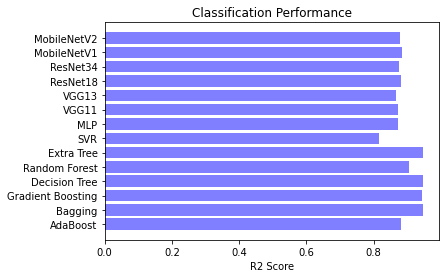

In [22]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()